In [67]:
import pandas as pd
from icecream import ic
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
datapath="F:/ExcelData/"

In [73]:
df=pd.read_excel(datapath+'V2_loan_cleaned_data.xlsx',index_col='CustomerID')

In [74]:
df.head()

,WasTheLoanApproved,LoanPayoffPeriodInMonths,LoanReason,RequestedAmount,InterestRate,Co-Applicant,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf,CheckingAccountBalance,DebtsPaid,SavingsAccountBalance,CurrentOpenLoanApplications
CustomerID,,,,,,,,,,,,,,,,
2,Y,9,goods,3074,1,none,4,2,33,owned,skilled,2,none,delayed,none,2
3,N,12,auto,939,4,none,7,2,28,owned,skilled,1,high,delayed,high,3
4,Y,9,auto,2507,2,none,10,4,51,free,unskill,1,none,paid,high,1
5,Y,18,goods,2238,2,none,4,1,25,owned,skilled,1,none,delayed,some,2
6,Y,24,repairs,5507,3,none,10,4,44,free,skilled,1,none,delayed,some,2


In [76]:
df['WasTheLoanApproved'].value_counts()

Y    348
N    167
Name: WasTheLoanApproved, dtype: int64

In [75]:
df['WasTheLoanApproved'].replace(to_replace='1',value='Y',inplace=True)

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'RequestedAmount'),
  Text(2, 0, 'YearsAtCurrentEmployer'),
  Text(3, 0, 'YearsInCurrentResidence'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'NumberOfDependantsIncludingSelf'),
  Text(6, 0, 'CurrentOpenLoanApplications')])

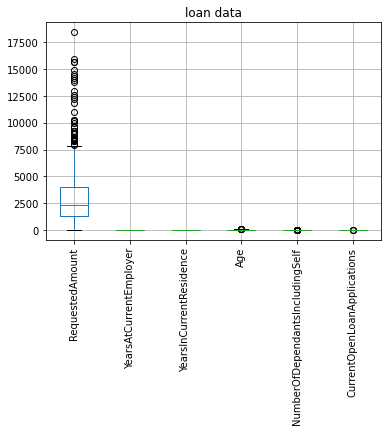

In [46]:
df.boxplot()
plt.title('loan data')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='LoanReason', ylabel='RequestedAmount'>

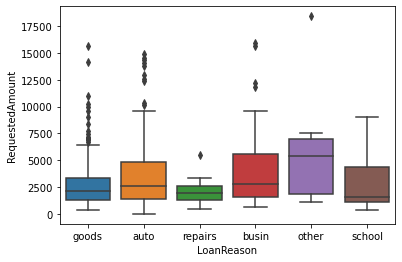

In [53]:
sns.boxplot(y=df['RequestedAmount'],x=df['LoanReason'])

<AxesSubplot:xlabel='LoanReason', ylabel='RequestedAmount'>

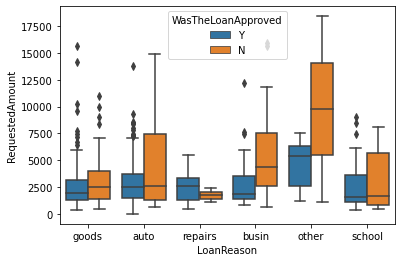

In [77]:
sns.boxplot(y=df['RequestedAmount'],x=df['LoanReason'],hue=df['WasTheLoanApproved'])

Text(0.5, 1.0, 'Boxplot')

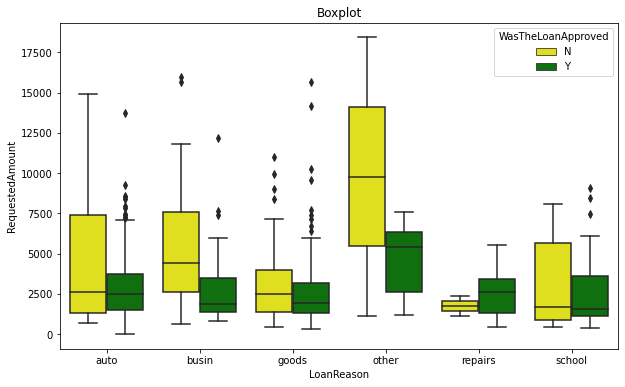

In [146]:
plt.figure(figsize=(10,6))

x=sns.boxplot(y='RequestedAmount',x='LoanReason',hue='WasTheLoanApproved',hue_order=['N','Y'],
            data=df,palette=['yellow','green','blue','red'],order=sorted(df['LoanReason'].unique().tolist()))

plt.title('Boxplot')

In [82]:
x=sorted(df['LoanReason'].unique().tolist())
x

['auto', 'busin', 'goods', 'other', 'repairs', 'school']

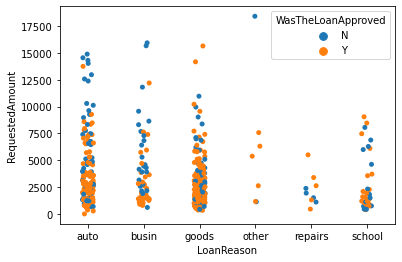

In [118]:
ax[1]=sns.stripplot(y='RequestedAmount',x='LoanReason',hue='WasTheLoanApproved',hue_order=['N','Y'],
            data=df,order=sorted(df['LoanReason'].unique().tolist()))

Text(0.5, 1.0, 'Boxplot')

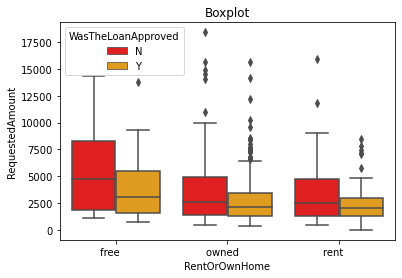

In [152]:
plt.figure(figsize=(6,4))

x=sns.boxplot(y='RequestedAmount',x='RentOrOwnHome',hue='WasTheLoanApproved',hue_order=['N','Y'],
            data=df,palette=['red','orange'],order=sorted(df['RentOrOwnHome'].unique().tolist()))
plt.title('Boxplot')

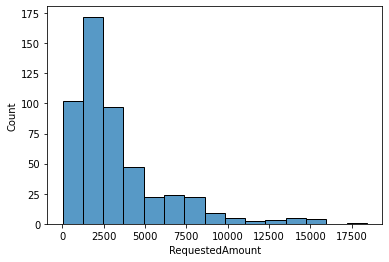

In [173]:
#plt.figure(figsize=(8,6))
x=sns.histplot(df['RequestedAmount'],bins=15)

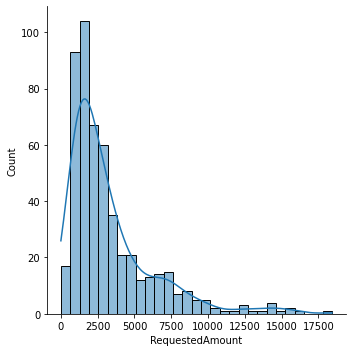

In [171]:
#plt.figure(figsize=(8,6))
x=sns.displot(df['RequestedAmount'],kde=True)

<AxesSubplot:xlabel='TypeOfCurrentEmployment', ylabel='count'>

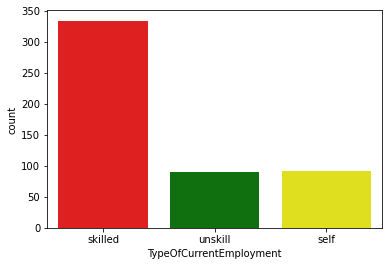

In [183]:
sns.countplot(df['TypeOfCurrentEmployment'],palette=['red','green','yellow'],)

<BarContainer object of 515 artists>

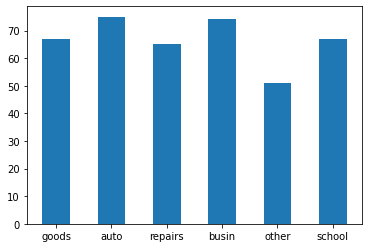

In [188]:
plt.bar(df['LoanReason'],df['Age'],width=0.5)

TypeError: 'str' object is not a mapping

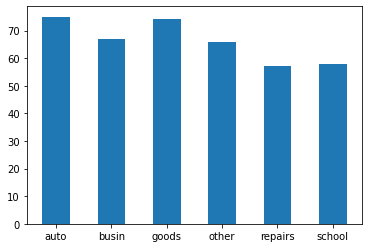

In [202]:
x=plt.bar(sorted(df['LoanReason']),df['Age'],width=0.5)
for z in x:
    height=z.get_height()
    plt.text(z.get_x(),z.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')

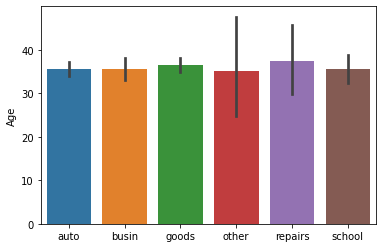

In [206]:
x=sns.barplot(sorted(df['LoanReason']),df['Age'])

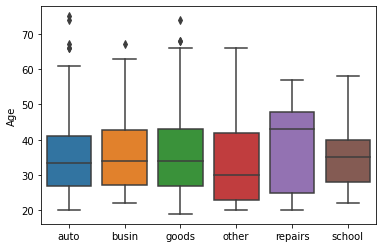

In [207]:
x=sns.boxplot(sorted(df['LoanReason']),df['Age'])

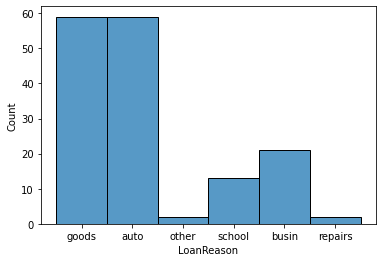

In [219]:
x=sns.histplot(df[(df['Age']<40) & (df['Age']>30)]['LoanReason'])

In [48]:
df.select_dtypes(include='object').columns

Index(['WasTheLoanApproved', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'InterestRate', 'Co-Applicant', 'RentOrOwnHome',
       'TypeOfCurrentEmployment', 'CheckingAccountBalance', 'DebtsPaid',
       'SavingsAccountBalance'],
      dtype='object')

In [51]:
df.select_dtypes(exclude='object').columns

Index(['RequestedAmount', 'YearsAtCurrentEmployer', 'YearsInCurrentResidence',
       'Age', 'NumberOfDependantsIncludingSelf',
       'CurrentOpenLoanApplications'],
      dtype='object')